In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import gurobipy as gp
from gurobipy import GRB

# Define Initial Discount Data

In [2]:
############## Discount Data ##############

discount_data = {
    'Discount%': [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2], 
    'HighValue': [0.0, 0.0, 0.2, 0.5, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 2.5, 3.0, 3.5, 4.0, 5.0, 7.0, 9.0, 11.0, 11.5, 11.5], 
    'MidValue': [0.25, 1.0, 2.0, 4.0, 4.5, 5.0, 6.0, 6.0, 6.7, 8.0, 8.0, 9.0, 10.0, 11.0, 11.1, 11.2, 11.7, 11.8, 11.9, 12.0], 
    'LowValue': [0.75, 1.0, 2.0, 3.0, 4.0, 4.5, 4.75, 5.0, 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6.0, 6.2, 6.3]
}

discount_df = pd.DataFrame(discount_data)

# Explore Relationship b/w Discount and Estimated Lifetime Increase

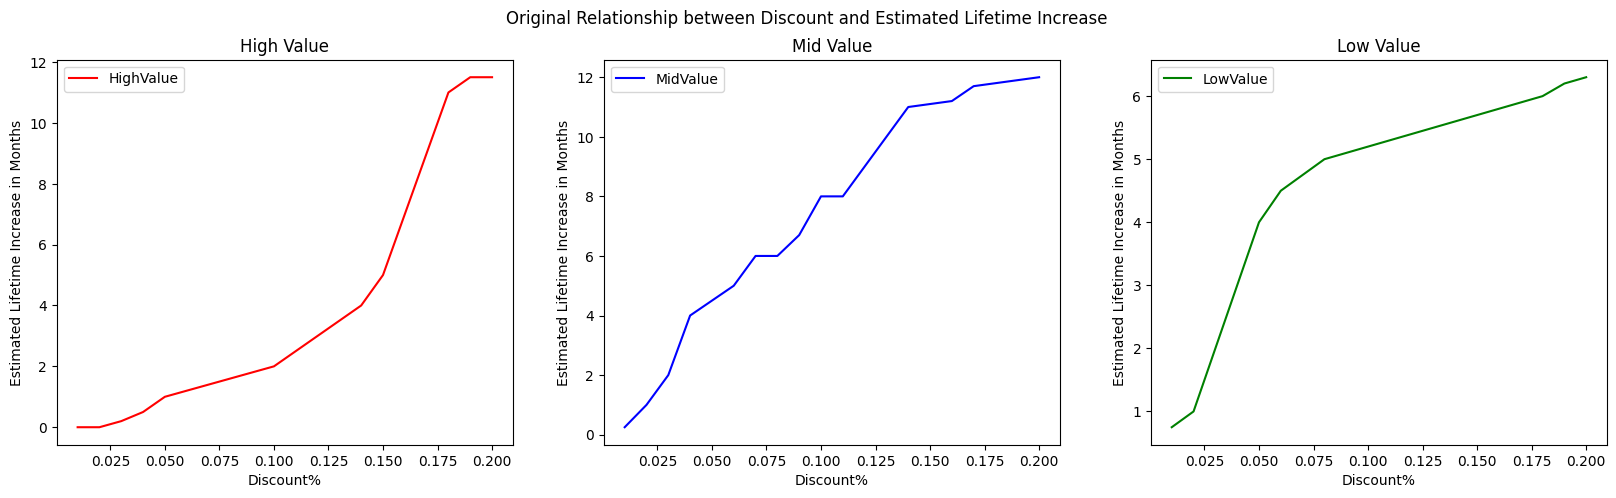

In [3]:
# Plot the discount data vs estimated value as subplots
fig, ax = plt.subplots(1, 3, figsize=(20, 5))

ax[0].set_ylabel('Estimated Lifetime Increase in Months')
discount_df.plot(x='Discount%', y='HighValue', ax=ax[0], title='High Value', color='r')

ax[1].set_ylabel('Estimated Lifetime Increase in Months')
discount_df.plot(x='Discount%', y='MidValue', ax=ax[1], title='Mid Value', color='b')

ax[2].set_ylabel('Estimated Lifetime Increase in Months')
discount_df.plot(x='Discount%', y='LowValue', ax=ax[2], title='Low Value', color='g')

plt.suptitle('Original Relationship between Discount and Estimated Lifetime Increase')
plt.show()

# Linearize the relationships between discount and lifetime increase using transformations

Based on the observations from the plot above, we can perform the following transformations
- High Value = Square Root
- Mid Vaue = No Transformations Required
- Low Value = Pow 2

In [4]:
discount_df['HighValueTransformed'] = discount_df['HighValue']**0.5
discount_df['MidValueTransformed'] = discount_df['MidValue']
discount_df['LowValueTransformed'] = discount_df['LowValue']**2

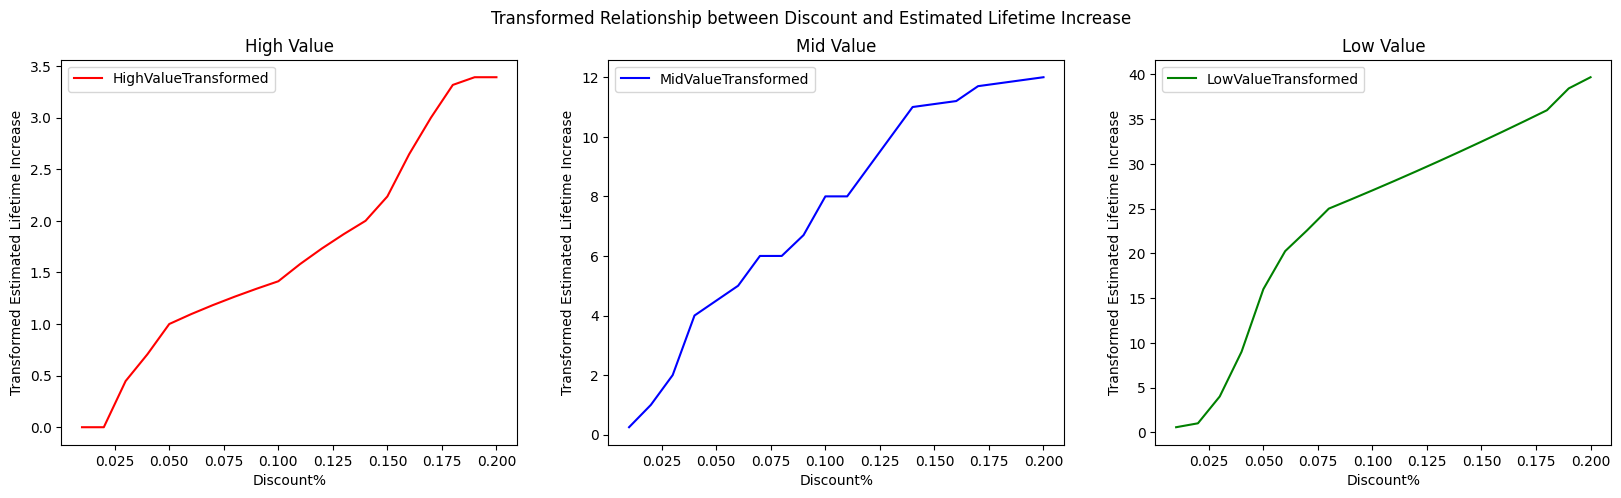

In [5]:
### plot transformed data as subplots
fig, ax = plt.subplots(1, 3, figsize=(20, 5))

ax[0].set_ylabel('Transformed Estimated Lifetime Increase')
ax[0].set_title('High Value')
discount_df.plot(x='Discount%', y='HighValueTransformed', kind='line', ax=ax[0], color='r')

ax[1].set_ylabel('Transformed Estimated Lifetime Increase')
ax[1].set_title('Mid Value')
discount_df.plot(x='Discount%', y='MidValueTransformed', kind='line', ax=ax[1], color='b')

ax[2].set_ylabel('Transformed Estimated Lifetime Increase')
ax[2].set_title('Low Value')
discount_df.plot(x='Discount%', y='LowValueTransformed', kind='line', ax=ax[2], color='g')

plt.suptitle('Transformed Relationship between Discount and Estimated Lifetime Increase')
plt.show()

# Build Regression Models for Each Tier - High, Mid, Low

In [6]:
########## High Value Model ##########
X = discount_df['Discount%']
X = sm.add_constant(X)
y = discount_df['HighValueTransformed']

model_high_value = sm.OLS(y, X).fit()
print(model_high_value.summary(), end="\n\n")

high_value_intercept = model_high_value.params[0]
high_value_beta = model_high_value.params[1]
print("---"*30)
print("Intercept: {0}, Beta: {1}".format(high_value_intercept, high_value_beta))

                             OLS Regression Results                             
Dep. Variable:     HighValueTransformed   R-squared:                       0.966
Model:                              OLS   Adj. R-squared:                  0.964
Method:                   Least Squares   F-statistic:                     517.1
Date:                  Wed, 13 Mar 2024   Prob (F-statistic):           1.04e-14
Time:                          17:24:53   Log-Likelihood:                 4.9638
No. Observations:                    20   AIC:                            -5.928
Df Residuals:                        18   BIC:                            -3.936
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1616      0.092

In [7]:
########## Mid Value Model ##########
X = discount_df['Discount%']
X = sm.add_constant(X)
y = discount_df['MidValueTransformed']

model_mid_value = sm.OLS(y, X).fit()
print(model_mid_value.summary(), end="\n\n")

mid_value_intercept = model_mid_value.params[0]
mid_value_beta = model_mid_value.params[1]
print("---"*30)
print("Intercept: {0}, Beta: {1}".format(mid_value_intercept, mid_value_beta))

                             OLS Regression Results                            
Dep. Variable:     MidValueTransformed   R-squared:                       0.957
Model:                             OLS   Adj. R-squared:                  0.955
Method:                  Least Squares   F-statistic:                     399.9
Date:                 Wed, 13 Mar 2024   Prob (F-statistic):           9.65e-14
Time:                         17:24:53   Log-Likelihood:                -23.366
No. Observations:                   20   AIC:                             50.73
Df Residuals:                       18   BIC:                             52.72
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8774      0.381      2.30

In [8]:
########## Low Value Model ##########
X = discount_df['Discount%']
X = sm.add_constant(X)
y = discount_df['LowValueTransformed']

model_low_value = sm.OLS(y, X).fit()
print(model_low_value.summary(), end="\n\n")

low_value_intercept = model_low_value.params[0]
low_value_beta = model_low_value.params[1]
print("---"*30)
print("Intercept: {0}, Beta: {1}".format(low_value_intercept, low_value_beta))

                             OLS Regression Results                            
Dep. Variable:     LowValueTransformed   R-squared:                       0.902
Model:                             OLS   Adj. R-squared:                  0.896
Method:                  Least Squares   F-statistic:                     165.4
Date:                 Wed, 13 Mar 2024   Prob (F-statistic):           1.64e-10
Time:                         17:24:53   Log-Likelihood:                -54.628
No. Observations:                   20   AIC:                             113.3
Df Residuals:                       18   BIC:                             115.2
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.7575      1.819      2.06

# Build Optimization Model

* <b>Decision Variables</b>: 
    - Number of customers to give discounts to in each Tier and for each Discount Depth % (0% to 20%)

        $\text{Let } \bm{C_{tier,disc}} \text{ denote the number of customers in tier } tier \in T \text{ and discount depth } disc \in D$

    <br>
    
    - Binary decision variable that indicates whether a discount was given or not

        $discApplied_{tier, disc} =
        \begin{cases} 
        1 & \text{if disc > 0 }\\
        0 & \text{if disc = 0 }\\
        \end{cases}
        $
        $\hspace{0.5cm} \forall tier \in T \text{ and } \forall disc \in D$

<br>

* <b>Objective:</b> 
    - Maximize the total revenue obtained by increasing the lifetime through the discounts offered

        $\text{HighTierRevFunction} = \sum_{disc \in D} R_{tier} \times (1-disc) \times C_{tier,disc} \times (L_{tier} + ((Intercept_{tier} + (disc \times BetaDisc_{tier}))^{2}) \times discApplied_{tier,disc} ) \text{ where, } tier \in High$  
        $\text{MidTierRevFunction} = \sum_{disc \in D} R_{tier} \times (1-disc) \times C_{tier,disc} \times (L_{tier} + (Intercept_{tier} + (disc \times BetaDisc_{tier})) \times discApplied_{tier,disc} ) \text{ where, } tier \in Mid$   
        $\text{LowTierRevFunction} = \sum_{disc \in D} R_{tier} \times (1-disc) \times C_{tier,disc} \times (L_{tier} + ((Intercept_{tier} + (disc \times BetaDisc_{tier}))^{0.5}) \times discApplied_{tier,disc} ) \text{ where, } tier \in Low$  
        <br>
        $\text{Maximize, } (HighTierRevFunction + MidTierRevFunction + LowTierRevFunction)$


<br>

* <b>Constraints:</b>
    - No more than 20% of total customer base should be given a discount
    
        $\sum_{\text{tier} \in T} \sum_{\text{disc} \in D} C_{tier, disc} \times discApplied_{tier, disc} \leq (\sum_{\text{tier} \in T} TotC_{tier}) \times 0.20$

    <br>
    
    - Total number of discounted and non-discounted customers in each tier should add up to the total number of customers present in each tier

        $\sum_{\text{disc} \in D} C_{tier, disc} = TotC_{tier} \hspace{0.5cm} \forall \text{tier} \in T$ 

<br>

<b>Where,</b>
- $TotC$ denotes the number total number of customers in each tier
- $T$ denotes the three tiers available i.e. $High, Mid, Low$
- $D$ denotes the depth of discount that can be offered to a customer from $0\%$ to $20\%$ at increments of $1\%$ each. $\text{Example: } (0.0, 0.01, 0.02, .... 0.20)$
- $R$ denotes the average monthly revenue per customer for each tier
- $L$ denotes the average baseline lifetime for each tier
- $Intercept$ is the value of the intercept of the discount vs lifetime increase estimation model for each tier
- $BetaDisc$ is the value of the beta coefficient of discount in the discount vs lifetime increase estimation model for each tier

In [9]:
#### Define Input Data and Regression Model Parameters ####

tiers, monthly_revenue, avg_lifetime_baseline, num_customers, intercepts, betas, transformation_applied = gp.multidict({
    'High': [60, 14, 40000, high_value_intercept, high_value_beta, 'sqrt'],
    'Mid': [50, 12, 25000, mid_value_intercept, mid_value_beta, 'none'],
    'Low': [40, 6, 10000, low_value_intercept, low_value_beta, 'pow2']
})

In [10]:
#### Define Discount Data ####
discounts = [0.0, *discount_df['Discount%'].tolist()]

In [11]:
#### Define Model ####

model = gp.Model('discounting')
model.params.nonConvex = 2

#### Define the main decision variables i.e. number of customers for each discount depth and tier ####
num_customers_tier_discount = model.addVars(
    tiers,
    discounts,
    name="num_customers_by_tier", 
    vtype=GRB.INTEGER
)

#### Define binary variable that is 0 if the discount is 0 and 1 otherwise ####
discount_applied = model.addVars(
    tiers,
    discounts,
    name="discount_applied",
    vtype=GRB.BINARY
)

Restricted license - for non-production use only - expires 2025-11-24
Set parameter NonConvex to value 2


In [12]:
#### Define Constraints ####

# Constraint 1: Total number of customers for each tier should be equal to the original number of customers
model.addConstrs(
    (gp.quicksum(num_customers_tier_discount[tier, discount] for discount in discounts) == num_customers[tier] for tier in tiers),
    name="total_customers_by_tier"
)

# Constraint 2: Total number of customers getting any discount should be less than or equal to 20% of the total number of customers
model.addConstr(
    (gp.quicksum(num_customers_tier_discount[tier, discount] * discount_applied[tier, discount] for tier in tiers for discount in discounts) <= 0.2 * gp.quicksum(num_customers[tier] for tier in tiers)),
    name="total_customers_discounted"
)

# Constraint 3: Binary variable discount_applied should be 0 if the discount is 0
model.addConstr(
    gp.quicksum(discount_applied[tier, 0] for tier in tiers) == 0,
    name="discount_applied_zero"
)

# Constraint 3: Force all values in binary constraint to 0 to check for revenue scenario if discount was not applied at all for any customer
# Uncomment only for scenario analysis
# model.addConstr(
#     gp.quicksum(discount_applied[tier, discount] for tier in tiers for discount in discounts) == 0,
#     name="discount_applied_zero"
# )

<gurobi.Constr *Awaiting Model Update*>

In [13]:
##### Define the Estimated Lifetime Increase Functions ####

def estimated_lifetime_increase(discount, tier):
    '''
    helper function to calculate the estimated lifetime increase reversing the transformation
    '''
    if transformation_applied[tier] == 'sqrt':
        lifetime_increase_value = ((intercepts[tier] + (betas[tier] * discount)))**2
    elif transformation_applied[tier] == 'pow2':
        lifetime_increase_value = ((intercepts[tier] + (betas[tier] * discount)))**(0.5)
    else:
        lifetime_increase_value = (intercepts[tier] + (betas[tier] * discount))

    return lifetime_increase_value


#### Define Objective Function ####
model.setObjective(
    gp.quicksum(
        ((avg_lifetime_baseline[tier] + (estimated_lifetime_increase(discount, tier)*discount_applied[tier, discount])) * monthly_revenue[tier] * (1-discount) * num_customers_tier_discount[tier, discount])
        for tier in tiers 
        for discount in discounts
    ),
    GRB.MAXIMIZE
)

In [14]:
# optimize the model
model.optimize()

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (win64 - Windows 11.0 (22621.2))

CPU model: AMD Ryzen 7 5825U with Radeon Graphics, instruction set [SSE2|AVX|AVX2]
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads

Optimize a model with 4 rows, 126 columns and 66 nonzeros
Model fingerprint: 0xb0c13595
Model has 63 quadratic objective terms
Model has 1 quadratic constraint
Variable types: 0 continuous, 126 integer (63 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  QMatrix range    [1e+00, 1e+00]
  Objective range  [2e+02, 8e+02]
  QObjective range [2e-02, 1e+03]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+04, 4e+04]
  QRHS range       [2e+04, 2e+04]
Presolve removed 1 rows and 3 columns
Presolve time: 0.02s
Presolved: 124 rows, 303 columns, 423 nonzeros
Presolved model has 120 SOS constraint(s)
Variable types: 0 continuous, 303 integer (120 binary)
Found heuristic solution: objective 5.736086e+07

Explored 1 nodes (0 simple

In [15]:
model.write('discounting.lp')
model.write('discounting.mps')

In [16]:
#### print the decision variables ####

for v in model.getVars():
    if v.x > 0:
        print(f"{v.varName}, {v.x}")

num_customers_by_tier[High,0.0], 40000.0
num_customers_by_tier[Mid,0.0], 10000.0
num_customers_by_tier[Mid,0.2], 15000.0
num_customers_by_tier[Low,0.0], 10000.0
discount_applied[High,0.02], 1.0
discount_applied[High,0.04], 1.0
discount_applied[High,0.07], 1.0
discount_applied[High,0.08], 1.0
discount_applied[High,0.09], 1.0
discount_applied[High,0.1], 1.0
discount_applied[High,0.11], 1.0
discount_applied[High,0.12], 1.0
discount_applied[High,0.13], 1.0
discount_applied[High,0.14], 1.0
discount_applied[High,0.15], 1.0
discount_applied[High,0.16], 1.0
discount_applied[High,0.17], 1.0
discount_applied[High,0.18], 1.0
discount_applied[High,0.19], 1.0
discount_applied[High,0.2], 1.0
discount_applied[Mid,0.01], 1.0
discount_applied[Mid,0.02], 1.0
discount_applied[Mid,0.03], 1.0
discount_applied[Mid,0.04], 1.0
discount_applied[Mid,0.05], 1.0
discount_applied[Mid,0.06], 1.0
discount_applied[Mid,0.07], 1.0
discount_applied[Mid,0.08], 1.0
discount_applied[Mid,0.09], 1.0
discount_applied[Mid,0.1]

In [17]:
#### print the objective function value ####
print(f"Objective Function Value: {model.objVal}")

Objective Function Value: 57360857.14285714


# Final Solutions:

- **Distribution of Customers by Tier & Discount Depth:**
    - High: 0% Discount = 40000
    - Mid: 0% Discount = 10000, 20% Discount = 15000
    - Low: 0% Discount = 10000

- **Total Revenue Generated With Optimization:** $57,360,857

- **Total Revenue Generated Without Optimization** $51,000,000

- **Incremental Revenue Generated:**: $6,360,857